In [4]:
csv_path = '/Users/zzy/Projects/select_from_sqlResult_1558435.csv'

In [5]:
import pandas as pd

In [6]:
!which python

/Users/zzy/anaconda/bin/python


In [8]:
content = pd.read_csv(csv_path, encoding='utf-8', delimiter='\t', error_bad_lines=False)

b'Skipping line 64073: expected 7 fields, saw 8\nSkipping line 84180: expected 7 fields, saw 8\n'


In [9]:
content = content.fillna('')

In [27]:
news_content = content['content'].tolist()

In [11]:
import jieba

In [12]:
def cut(string): return ''.join(jieba.lcut(string))

In [13]:
import re

In [18]:
def token(string):
    return ' '.join(re.findall(r'[\d|\w]+', string))

In [28]:
news_content = [token(str(n)) for n in news_content]

In [22]:
news_content[:1]

['此外 自本周 6月12日 起 除小米手机6等15款机型外 其余机型已暂停更新发布 含开发版 体验版内测 稳定版暂不受影响 以确保工程师可以集中全部精力进行系统优化工作 有人猜测这也是将精力主要用到MIUI 9的研发之中 MIUI 8去年5月发布 距今已有一年有余 也是时候更新换代了 当然 关于MIUI 9的确切信息 我们还是等待官方消息']

In [29]:
news_content = [cut(n) for n in news_content]

In [30]:
news_content[0]

'此外   自 本周   6 月 12 日   起   除 小米 手机 6 等 15 款 机型 外   其余 机型 已 暂停 更新 发布   含 开发 版   体验版 内测   稳定版 暂不受 影响   以 确保 工程师 可以 集中 全部 精力 进行 系统优化 工作   有人 猜测 这 也 是 将 精力 主要 用到 MIUI   9 的 研发 之中   MIUI   8 去年 5 月 发布   距今已有 一年 有余   也 是 时候 更新换代 了   当然   关于 MIUI   9 的 确切 信息   我们 还是 等待 官方消息'

**list is not hashable,比如字典D,key不能是list，因为list会变**  
**lru_cache(maxsize) least recent used, 把最近最少使用的删除掉，不如cache大于100次方就要把一些东西删除**

In [31]:
from gensim.models import Word2Vec

In [35]:
from gensim.models.word2vec import LineSentence

In [37]:
new_word2vec = Word2Vec(LineSentence('/Users/zzy/Projects/after_cut.txt'), size=35, workers=8)

In [42]:
new_word2vec.most_similar('亚洲',topn=20)

/Users/zzy/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('欧洲', 0.8074580430984497),
 ('全球', 0.7506750822067261),
 ('世界', 0.7306428551673889),
 ('亚太地区', 0.7300494909286499),
 ('国内', 0.708428144454956),
 ('全世界', 0.7077727317810059),
 ('中国', 0.7076208591461182),
 ('芬兰', 0.7062307000160217),
 ('拉美', 0.7045878171920776),
 ('欧美', 0.6983085870742798),
 ('德国', 0.6917527914047241),
 ('北美', 0.6888072490692139),
 ('澳大利亚', 0.6849454641342163),
 ('非洲', 0.6599379777908325),
 ('拉美地区', 0.6563130617141724),
 ('北欧', 0.65463787317276),
 ('影响力', 0.6438050270080566),
 ('亚太', 0.6437181234359741),
 ('新加坡', 0.6393218040466309),
 ('东亚', 0.6317216157913208)]

## More Data, Better Results

In [44]:
new_word2vec.most_similar('说', topn=50)

/Users/zzy/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('表示', 0.9026679992675781),
 ('认为', 0.8723512291908264),
 ('指出', 0.8648579120635986),
 ('看来', 0.8237572908401489),
 ('坦言', 0.8208275437355042),
 ('介绍', 0.773198127746582),
 ('称', 0.7647957801818848),
 ('透露', 0.7605307102203369),
 ('告诉', 0.7434329986572266),
 ('明说', 0.7243958711624146),
 ('提到', 0.707909107208252),
 ('所说', 0.7059029340744019),
 ('强调', 0.7054607272148132),
 ('文说', 0.7005323171615601),
 ('特别强调', 0.6879642009735107),
 ('称赞', 0.6679692268371582),
 ('中说', 0.6593860387802124),
 ('建议', 0.635765790939331),
 ('时说', 0.6203107237815857),
 ('问', 0.6119447946548462),
 ('马在', 0.608752965927124),
 ('写道', 0.6042028665542603),
 ('道', 0.5896875262260437),
 ('纳说', 0.5884010195732117),
 ('直言', 0.5844395160675049),
 ('相信', 0.5836243629455566),
 ('说道', 0.5787386298179626),
 ('的话', 0.5749096870422363),
 ('资深', 0.5648837089538574),
 ('首先', 0.5629379749298096),
 ('强调指出', 0.5540304183959961),
 ('申明', 0.5534663200378418),
 ('知道', 0.5534263849258423),
 ('眼中', 0.5525602698326111),
 ('如是说', 0.547796

In [45]:
from collections import defaultdict

In [56]:
def get_related_words(initial_words, model):
    """
    @initial+words are initial words we already know
    @model is the word2vec model
    """
    unseen = initial_words
    
    seen = defaultdict(int)
    
    max_size = 500     # could be greater
    
    while unseen and len(seen) < max_size:
        
        if len(seen) % 50 ==0:
            print('seen length : {}'.format(len(seen)))
        
        node = unseen.pop(0)
        
        new_expanding = [w for w, s in model.most_similar(node, topn=20)]
        
        unseen += new_expanding
        
        seen[node] += 1    # 赋值函数可以做变化，可以做dynamic programming
    return seen

In [58]:
related_words = get_related_words(['说','表示'], new_word2vec)

seen length : 0


/Users/zzy/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).


seen length : 50
seen length : 50
seen length : 100
seen length : 100
seen length : 100
seen length : 100
seen length : 150
seen length : 200
seen length : 250
seen length : 250
seen length : 250
seen length : 250
seen length : 250
seen length : 300
seen length : 350
seen length : 350
seen length : 400
seen length : 450


In [52]:
len(new_word2vec.wv.vocab)

98136

In [60]:
sorted(related_words.items(), key = lambda x: x[1], reverse=True)

[('说', 87),
 ('表示', 84),
 ('认为', 84),
 ('指出', 84),
 ('提到', 73),
 ('透露', 71),
 ('坦言', 70),
 ('所说', 62),
 ('特别强调', 55),
 ('看来', 54),
 ('强调', 48),
 ('称', 46),
 ('介绍', 36),
 ('明说', 36),
 ('中说', 35),
 ('建议', 34),
 ('告诉', 32),
 ('称赞', 28),
 ('呼吁', 28),
 ('提及', 28),
 ('问', 26),
 ('普遍认为', 26),
 ('直言', 23),
 ('声称', 21),
 ('相信', 20),
 ('表明', 19),
 ('说道', 19),
 ('时说', 17),
 ('觉得', 17),
 ('中称', 17),
 ('写道', 17),
 ('对此', 16),
 ('引用', 16),
 ('文说', 15),
 ('眼中', 15),
 ('给出', 14),
 ('承认', 14),
 ('知情', 13),
 ('质疑', 13),
 ('证实', 13),
 ('回答', 13),
 ('解释', 13),
 ('指责', 12),
 ('的话', 12),
 ('描述', 12),
 ('说明', 11),
 ('提出', 11),
 ('地说', 11),
 ('形容', 11),
 ('要说', 11),
 ('重申', 11),
 ('事实上', 10),
 ('反映', 10),
 ('要求', 10),
 ('资深', 9),
 ('提醒', 9),
 ('应', 9),
 ('批评', 9),
 ('来说', 8),
 ('而言', 8),
 ('还是', 8),
 ('宣称', 8),
 ('谈论', 8),
 ('问道', 8),
 ('确信', 8),
 ('怼', 8),
 ('阐述', 8),
 ('谈谈', 8),
 ('如是说', 8),
 ('感叹', 8),
 ('解读', 7),
 ('颇深', 7),
 ('接受', 7),
 ('具名', 7),
 ('正如', 7),
 ('远远不够', 7),
 ('慎重考虑', 7),
 ('竭尽', 7),
 ('看准

## **weak supervised + heuristic search**

---

**keywords**  
- 文本中出现频率较高
- 在这篇文章中出现的次数较多，在别的文章中出现的次数很少


**TF-IDF : Term Frequency - Inverse Document Frequency  **
## $idf_t = log\frac{N}{df_t}$
- TF表示词条在文档d中出现的频率
- df_t就是含有该词的文档数，N是总文档数
- 加log是为了使变化平缓一点

## $TF-IDF=TF * idf_t$

# TFIDF Key Words

In [61]:
content.head()

,id,author,source,content,feature,title,url
0,89617,,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\n至于...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\n@深圳交警微博称：昨日清晨交...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...


In [89]:
def document_frequency(word):
    return sum(1 for n in news_content if word in n)

In [90]:
document_frequency('的')

70338

In [91]:
import math

In [92]:
def idf(word):
    '''
    Gets the inversed document frequency
    '''
    return math.log10(len(news_content) / document_frequency(word))

In [93]:
idf('的')< idf('小米')

True

In [75]:
def tf(word, document):
    """
    Gets the term frequency of a @word in a @document 
    """
    words = document.split()
    
    return sum(1 for w in words if w == word)

In [76]:
tf('银行', news_content[11])

6

In [96]:
def get_keywords_of_a_document(document):
    words = set(document.split())  #不加set会出现很多相同的
    
    tfidf = [
        (w, tf(w, document) * idf(w)) for w in words
    ]
    
    tfidf = sorted(tfidf, key=lambda x: x[1], reverse=True)
    
    return tfidf

In [97]:
%prun get_keywords_of_a_document(news_content[0])

In [106]:
machine_new_keywords = get_keywords_of_a_document(news_content[101])

# Wordcloud

In [101]:
import wordcloud

In [104]:
wc = wordcloud.WordCloud('/Users/zzy/Downloads/SourceHanSerifSC-Regular.otf')

In [105]:
import matplotlib.pyplot as plt
%matplotlib inline

In [107]:
wc.generate_from_frequencies?

In [108]:
wc.generate_from_frequencies(machine_new_keywords)

AttributeError: 'list' object has no attribute 'items'

In [109]:
machine_new_keywords_dict = {w: score for w, score in machine_new_keywords}

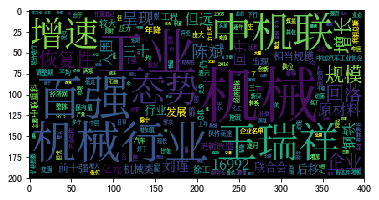

In [112]:
plt.imshow(wc.generate_from_frequencies(machine_new_keywords_dict))

In [113]:
shenzhen_social_news = get_keywords_of_a_document(news_content[4])

In [114]:
from PIL import Image

In [115]:
import numpy as np

In [123]:
police_mask = np.array(Image.open('/Users/zzy/Downloads/下载.png'))

In [124]:
wordcloud_with_mask = wordcloud.WordCloud(
    font_path='/Users/zzy/Downloads/SourceHanSerifSC-Regular.otf',
    mask = police_mask)

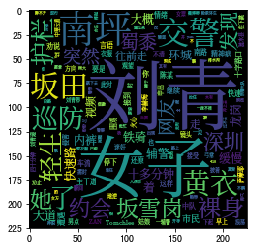

In [127]:
plt.imshow(wordcloud_with_mask.generate_from_frequencies({w:s for w, s in shenzhen_social_news}))

**TF-IDF弊端：** 
- 同义词会很严重影响相似度
- 文本有感情色彩，比如否定的否定

## Representation + Policy

Scikit-Learning TFIDF and Simplest Classification Model
  
$sim(d_1,d_2) = \frac{\vec{V}(d_1)*\vec{V}(d_2)}{\vert \vec{V}(d_1)\vert \vert \vec{V}(d_2) \vert}$ (类似余弦距离， 夹角越大，距离越大）

# TFIDF

In [128]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [129]:
vectorized = TfidfVectorizer()

In [130]:
sample_num = 1000
sub_samples = news_content[:sample_num]

In [131]:
X = vectorized.fit_transform(sub_samples)

/Users/zzy/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [132]:
X.shape

(1000, 43851)

In [144]:
vectorized.vocabulary_ # 这里显示的是改词在哪个位置

{'此外': 27288,
 '本周': 25803,
 '12': 97,
 '小米': 18002,
 '手机': 21587,
 '15': 171,
 '机型': 25938,
 '其余': 9234,
 '暂停': 25185,
 '更新': 25298,
 '发布': 12453,
 '开发': 19567,
 '体验版': 7609,
 '内测': 9359,
 '稳定版': 32707,
 '暂不受': 25182,
 '影响': 20125,
 '确保': 32141,
 '工程师': 18563,
 '可以': 12866,
 '集中': 41995,
 '全部': 8854,
 '精力': 33464,
 '进行': 39712,
 '系统优化': 33539,
 '工作': 18517,
 '有人': 25490,
 '猜测': 30199,
 '主要': 5480,
 '用到': 30792,
 'miui': 2143,
 '研发': 32063,
 '之中': 5540,
 '去年': 12200,
 '距今已有': 38706,
 '一年': 3096,
 '有余': 25495,
 '时候': 24798,
 '更新换代': 25299,
 '当然': 20053,
 '关于': 9149,
 '确切': 32144,
 '信息': 8060,
 '我们': 21296,
 '还是': 39520,
 '等待': 33210,
 '官方消息': 17242,
 '骁龙': 43153,
 '835': 1056,
 '作为': 7702,
 '唯一': 14013,
 '通过': 40181,
 'windows': 2808,
 '10': 30,
 '桌面': 26815,
 '平台': 19055,
 '认证': 37276,
 'arm': 1241,
 '处理器': 15396,
 '高通': 43421,
 '强调': 19979,
 '不会': 4067,
 '因为': 14408,
 '考虑': 34795,
 '性能': 20683,
 '屏蔽掉': 18295,
 '核心': 26699,
 '相反': 31634,
 '他们': 6862,
 '联手': 34953,
 '微软': 20352,
 '找到': 

In [138]:
X[0] # 这里的sparse matrix来存储是因为有很多空值

<1x43851 sparse matrix of type '<class 'numpy.float64'>'
	with 47 stored elements in Compressed Sparse Row format>

In [148]:
np.where(X[0].toarray())   # 哪些标记的值不为0

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0]),
 array([   97,   171,  2143,  3096,  5480,  5540,  7609,  8060,  8854,
         9149,  9234,  9359, 12200, 12453, 12866, 17242, 18002, 18517,
        18563, 19567, 20053, 20125, 21296, 21587, 24798, 25182, 25185,
        25298, 25299, 25490, 25495, 25803, 25938, 27288, 30199, 30792,
        32063, 32141, 32144, 32707, 33210, 33464, 33539, 38706, 39520,
        39712, 41995]))

In [141]:
X[0].toarray().shape

(1, 43851)

In [142]:
X[0].toarray()[0][97]

0.06546355070675368

In [143]:
news_content[0]

'此外   自 本周   6 月 12 日   起   除 小米 手机 6 等 15 款 机型 外   其余 机型 已 暂停 更新 发布   含 开发 版   体验版 内测   稳定版 暂不受 影响   以 确保 工程师 可以 集中 全部 精力 进行 系统优化 工作   有人 猜测 这 也 是 将 精力 主要 用到 MIUI   9 的 研发 之中   MIUI   8 去年 5 月 发布   距今已有 一年 有余   也 是 时候 更新换代 了   当然   关于 MIUI   9 的 确切 信息   我们 还是 等待 官方消息'

In [145]:
import random

In [146]:
document_id_1, document_id_2 = random.randint(0, 1000), random.randint(0, 1000)

In [150]:
vector_of_d_1 = X[document_id_1].toarray()[0]

In [151]:
vector_of_d_2 = X[document_id_2].toarray()[0]

In [152]:
news_content[document_id_1]

'刚刚 过去 的 国庆 黄金周   出境 邮轮 旅游 市场 成绩 喜人   根据 同程 旅游 近日 发布 的   2016 国庆 黄金周 出境 邮轮 出游 报告   今年 国庆 黄金周 期间   出境 邮轮 出游 人数 约 为 14 万人   同比 增长 52   其中 通过 同程 邮轮 出游 的 人数 近 2 万人   同比 增长 81   62   江浙沪 仍 是 主要 客源地   北京 天津 游客 最壕   根据   报告   数据   今年 国庆 黄金周 期间   出游 日期 为 2016 年 9 月 24 日至 10 月 7 日   出境 邮轮 旅游 的 出游 人数 约 为 14 万   同比 增长 52   其中   经由 同程 邮轮 出游 的 人数 达到 近 2 万人   同比 增长 81   62   主要 因   超级 邮轮 节   等 活动 的 拉动   从 客源地 来看   上海   江苏   浙江   北京   天津 等 地 用户 选择 邮轮 出游 的 热情 较 高   其中 仅 江浙沪 出游 人数 占 比 就 已经 近半   达到 45   96   出发 港 城市 中   约 有 七成 游客 选择 在 上海 母港 乘坐 邮轮   上海港 依旧 是 中国 邮轮 主要 的 出发 港   其次 为 天津港   占 比 约 为 21   44   国庆 期间   邮轮 人均 消费   不 含 购物 消费   较 平时 大幅提高   约 有 26   70   的 用户 消费 在 5001 元 以上   2000 元 以下 占 比仅 为 13   09   在 主要 的 邮轮 出游 省市 中   北京 人均 消费 最高   约 为 5495 元   其次 为 天津   约 为 4759 元   而 主要 客源地 江浙沪 地区 人均 消费 相对 较 低   在 3500 元 上下 浮动   中老年 出游 群体 占 比近 半   家庭 出游 为 主要 出游 类型   邮轮 旅行 舒适 安全   免去 车马 劳顿   且 中老年 有 经济 能力 和 充裕 的 时间   因此 中老年 是 邮轮 出游 主力军   国庆 期间   同程 邮轮 共 服务 近 1 万 中老年人 群 进行 邮轮 出游   报告   显示   其中 有 61 岁 以上 人群 占 比 

In [153]:
news_content[document_id_2]

'北京 时间 6 月 21 日   足协杯 第四轮 全面 开打   江苏 苏宁 易 购队 坐镇 主场 对阵 河南建业队   两队 将 在 南京 奥体中心 体育场 展开 一场 较量   争夺 足协杯 8 强 的 席位   今天下午   苏宁 赛前 发布会 在 奥体中心 进行   苏宁 主教练 卡佩罗 携阵 中 后防 大将 李昂 出席   在 介绍 球队 赛前 训练 情况 时   卡佩罗 表示   我们 在 周日 的 比赛 后 进行 了 针对性 的 训练   训练 的 效果 非常 理想   我 很 满意 队伍 训练 的 表现   我 觉得 我们 现在 有 一个 新 的 开始   会 踢 得 越来越 好 的   跟随 主帅 一起 出席 赛前 发布会 的 李昂 在 谈到 明晚 一战 时 表示   这 两天 教练 对于 我们 的 训练 要求 哦 的 非常 严格   在 细节 方面 也 做 得 非常 好   做 了 很多 针对性 的 部署   相信 明天 会 是 一场 精彩 的 比赛   我们 在 我们 的 主场 一定 要 拿下 对手   足协杯 对于 江苏 足球 来说 是 一个 传统 优势 赛事   考虑 到 目前 双线 作战 的 情况   主帅 在 两项 赛事 中 有没有 一个 战略性 的 策略   转会 窗口 已经 开启 您 有没有 相应 的 规划   面对 这些 问题   卡佩罗 说   我 还 没有 你 说 的 这样 需要 做 选择   我们 无论 在 联赛 还是 足协杯 中 都 要 取得 好 成绩   我 相信 我们 的 队伍 有 这样 的 实力   另外   我 的 注意力 只会 集中 在 赛场 上 不会 集中 在 转会 市场 上   我 只 需要 我 的 队员 到 场上 之后 把 他们 所有 能 做 出来 的 做 出来 就 可以 了   这场 比赛 为什么 会带 李昂 参加 发布会   对此   卡佩罗 坦言   他 是 大家 心中 选出 的   这次 我们 带 李昂 是因为 他 是 明天 首发 球员   下次 我 也 会 更换 别的 球员   大家 拭目以待 吧   曲小 尤   发自 南京'

In [154]:
document_id_3 = random.randint(0, 1000)

In [155]:
news_content[document_id_3]

'点击 图片 进入 下 一页   图为 一 满载 32 吨 甲醇 的 罐车 发生 侧翻 事故   张书浩   摄   中新网 重庆 6 月 23 日电   钟旖   张书浩   记者 23 日 从 重庆 消防 部门 获悉   22 日 下午 渝 湘 高速 重庆 酉阳 段   一 满载 32 吨 甲醇 的 罐车 发生 侧翻 事故   事故 造成 车内 1 人 被困   罐体 因 受损 发生 轻微 泄漏   致使 该 路段 单边 封闭 5 个 多 小时   经过 多 部门 联合 处置   路段 已 于 当晚 21 时许 恢复 通行   22 日 16 时许   重庆 酉阳 消防大队 指挥 中心 接警 后   立即 调派 桃花源 中队 3 台 消防车   24 名 官兵 赶赴现场 营救 被困 人员   并 对 泄漏 的 甲醇 进行 稀释   事发 地点 位于 渝 湘 高速 酉阳 往 秀山 方向 何家坝 大桥 附近   消防官兵 到达 事故现场 后 发现 槽车 罐体 轻微 受损   少量 甲醇 从 罐体 裂缝 泄漏 出来   现场 情况 十分 危险   消防官兵 针对 现场 情况   立即 疏散人员   设置 警戒 区   消防 救援 组 先是 尝试 使用 堵漏 工具 对 罐体 实施 堵漏 作业   但 由于 泄漏 口 太小   无法 进行 堵漏   最终 只能 采取 架设 水枪 对 罐体 泄漏 出 的 甲醇 进行 稀释 的 办法   现场   高速 执法 部门 已 对 道路 一侧 过往 车辆 采取 交通管制   实施 单边 封闭   并 协调 相关 部门 调派 大型 吊车   清障车 协助 救援   点击 图片 进入 下 一页   在 做好 安全 防护 的 情况 下   4 名 消防官兵 冒 着 甲醇 泄漏 随时 可能 发生 燃烧 爆炸 的 危险   靠近 驾驶室 营救 被困 者   但 由于 驾驶室 在 侧翻 中撞 上 了 山体   已经 严重 变形   救援 空间 十分 的 狭小   消防官兵 们 首先 使用 液压 顶杆 撑起 变形 驾驶室 营造 救援 空间   并 刨 开 泥土 和 杂草   慢慢 地 把 被困 者 双腿 取出   由于 驾驶室 已 严重 挤压 变形   救援 进展 缓慢   直至 17 时 42 分   驾驶员 被 成功 救出 并 送往 医院 治疗

In [156]:
vector_of_d_3 = X[document_id_3].toarray()[0]

In [157]:
from scipy.spatial.distance import cosine

In [158]:
def distance(v1, v2):return cosine(v1,v2)

In [159]:
distance(vector_of_d_1, vector_of_d_2)

0.9934548948640194

In [160]:
distance(vector_of_d_1, vector_of_d_3)

0.9966322975957853

In [161]:
distance(vector_of_d_2, vector_of_d_3)

0.9904054962751752

In [162]:
sorted(list(range(1000)), key=lambda i: distance(vector_of_d_2, X[i].toarray()[0]))

/Users/zzy/anaconda/lib/python3.6/site-packages/scipy/spatial/distance.py:649: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


[558,
 24,
 369,
 28,
 48,
 108,
 42,
 43,
 86,
 38,
 109,
 52,
 116,
 59,
 7,
 110,
 81,
 13,
 124,
 49,
 93,
 65,
 77,
 83,
 91,
 46,
 33,
 8,
 98,
 11,
 35,
 36,
 73,
 0,
 25,
 107,
 21,
 96,
 62,
 75,
 6,
 105,
 61,
 64,
 22,
 31,
 14,
 79,
 123,
 54,
 101,
 119,
 20,
 37,
 95,
 9,
 94,
 90,
 1,
 76,
 4,
 19,
 125,
 69,
 115,
 97,
 27,
 5,
 112,
 68,
 40,
 44,
 84,
 71,
 29,
 56,
 23,
 26,
 113,
 114,
 102,
 106,
 85,
 47,
 70,
 34,
 121,
 57,
 58,
 120,
 66,
 67,
 80,
 78,
 63,
 30,
 122,
 16,
 82,
 60,
 41,
 32,
 17,
 104,
 72,
 51,
 45,
 15,
 18,
 118,
 10,
 55,
 111,
 89,
 2,
 99,
 12,
 92,
 3,
 39,
 50,
 53,
 74,
 87,
 88,
 100,
 103,
 144,
 147,
 155,
 241,
 611,
 261,
 499,
 354,
 509,
 512,
 253,
 352,
 223,
 531,
 529,
 387,
 616,
 180,
 754,
 156,
 481,
 211,
 162,
 301,
 192,
 127,
 358,
 377,
 513,
 686,
 911,
 458,
 341,
 133,
 371,
 738,
 520,
 700,
 166,
 786,
 892,
 229,
 541,
 535,
 711,
 316,
 881,
 157,
 278,
 486,
 488,
 198,
 435,
 484,
 255,
 269,
 981,
 821,


In [163]:
news_content[558]

'北京 时间 6 月 21 日   足协杯 第四轮 全面 开打   江苏 苏宁 易 购队 坐镇 主场 对阵 河南建业队   两队 将 在 南京 奥体中心 体育场 展开 一场 较量   争夺 足协杯 8 强 的 席位   今天下午   苏宁 赛前 发布会 在 奥体中心 进行   苏宁 主教练 卡佩罗 携阵 中 后防 大将 李昂 出席   在 介绍 球队 赛前 训练 情况 时   卡佩罗 表示   我们 在 周日 的 比赛 后 进行 了 针对性 的 训练   训练 的 效果 非常 理想   我 很 满意 队伍 训练 的 表现   我 觉得 我们 现在 有 一个 新 的 开始   会 踢 得 越来越 好 的   跟随 主帅 一起 出席 赛前 发布会 的 李昂 在 谈到 明晚 一战 时 表示   这 两天 教练 对于 我们 的 训练 要求 哦 的 非常 严格   在 细节 方面 也 做 得 非常 好   做 了 很多 针对性 的 部署   相信 明天 会 是 一场 精彩 的 比赛   我们 在 我们 的 主场 一定 要 拿下 对手   足协杯 对于 江苏 足球 来说 是 一个 传统 优势 赛事   考虑 到 目前 双线 作战 的 情况   主帅 在 两项 赛事 中 有没有 一个 战略性 的 策略   转会 窗口 已经 开启 您 有没有 相应 的 规划   面对 这些 问题   卡佩罗 说   我 还 没有 你 说 的 这样 需要 做 选择   我们 无论 在 联赛 还是 足协杯 中 都 要 取得 好 成绩   我 相信 我们 的 队伍 有 这样 的 实力   另外   我 的 注意力 只会 集中 在 赛场 上 不会 集中 在 转会 市场 上   我 只 需要 我 的 队员 到 场上 之后 把 他们 所有 能 做 出来 的 做 出来 就 可以 了   这场 比赛 为什么 会带 李昂 参加 发布会   对此   卡佩罗 坦言   他 是 大家 心中 选出 的   这次 我们 带 李昂 是因为 他 是 明天 首发 球员   下次 我 也 会 更换 别的 球员   大家 拭目以待 吧   曲小 尤   发自 南京'

In [166]:
document_id_2

558

In [168]:
news_content[369]

'近日   刚刚 上任 的 苏宁 队史 最大 牌 外教   世界 名帅 卡佩罗 接受 了 央视 的 采访   Q   央视 记者   A   卡佩罗   Q   有 一些 人 质疑 说   两年 了 没有 做 主教练 在 一线 执教   是不是 不太 适应   我 知道 在 两年 时间 里 你 一直 在 欧洲 接触 着 足球   包括 是 欧冠 观察团 的 成员   重新 回到 一线 有没有 这种 担心   A   这 两年 不是 我 不 工作   是 我 不 愿意 去 工作   我 在 两年 之内 收到 了 非常 非常 多 的 俱乐部 的 邀请   但是 我 全都 拒绝 了   那么 我 选择 江苏 苏宁 是因为 苏宁 给 了 我 一个 非常 伟大 的 计划   我 跟 这里 有 一年 半 的 合同   为什么 我会 在 我 的 职业生涯 后期 还 在 接触 这样 一份 合同 呢   因为 我 希望 将 苏宁 这支 球队 打 造成 我 的 一支 好 的 球队 后   再 由 俱乐部 选择 合适 人选   我 再 把 它 交到 他 的 手上   Q   这样 短 的 时间 够不够 实现 这样 的 愿望   A   这个 球队 里面 有 非常 好 的 球员   他们 有 一定 的 价值   作为 主教练 来说   首先 我 了解 这个 球队 哪 一部分 需要 提高   以及 怎么 去 提高   我 相信 跟 我 的 教练 团队   包括 萨巴蒂 尼 先生   一起 找到 球队 的 问题   是 可以 在 短时间 内 解决 的   Q   看到 卡佩罗 先生 在 球场上 总是 表情 特别 严肃   但是 今天 接触 后 发现 他 的 笑容 很多 也 很 可爱   A   你们 看到 我 的 时候   那时 我 在 工作 状态 下 的 表情   但是 其实 我 在 日常生活 中 和 普通人 一样   我 也 会 有 我 开心 的 点   但是 在 工作 中 我 要 保持 大家 对 我 高度 的 尊重   以及 我 对 球队 高度 的 管理   Q   在 球队 里 需要 严肃 一点   让 球员 感到 害怕   A   所谓 的 尊重 呢   指 的 是 我们 队伍 时间 首先 大家 准时 准点 到达 训练场   队员 之间 的 相互尊重   队员 与 队员 之间 取得成

---

In [ ]:
B